In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy.stats import norm
import math
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Serif'
mpl.rcParams['font.size'] = 15
%config InlineBackend.figure_format = 'retina'

In [2]:
#Mrk421 old data- comparing results with Axel's
#E above 1TeV
D1=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/new_Eg1TeV.root")
#E below 1TeV
D2=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/new_El1TeV.root")

#file.keys()
lightcurve1=D1['LightCurve;1']
lightcurve2=D2['LightCurve;1']

fX = lightcurve2.all_members['fX']
fY = lightcurve2.all_members['fY']
fEX = lightcurve2.all_members['fEX']
fEY = lightcurve2.all_members['fEY']
FX = lightcurve1.all_members['fX']
FY = lightcurve1.all_members['fY']
FEX = lightcurve1.all_members['fEX']
FEY = lightcurve1.all_members['fEY']

#Mrk421 NEW data Feb'24 to June'24
#E above 1TeV
new_D1=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_NEW.root")
#E below 1TeV
new_D2=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_NEW.root")

LC1=new_D1['LightCurve;1']
LC2=new_D2['LightCurve;1']
lcX = LC2.all_members['fX']
lcY = LC2.all_members['fY']
lcEX = LC2.all_members['fEX']
lcEY = LC2.all_members['fEY']
LCX = LC1.all_members['fX']
LCY = LC1.all_members['fY']
LCEX = LC1.all_members['fEX']
LCEY = LC1.all_members['fEY']

#for E<1TeV
final_X=np.concatenate((fX, lcX))
final_EX=np.concatenate((fEX, lcEX))
final_Y=np.concatenate((fY, lcY))
final_EY=np.concatenate((fEY, lcEY))
#E>1TeV
finalX=np.concatenate((FX, LCX))
finalEX=np.concatenate((FEX, LCEX))
finalY=np.concatenate((FY, LCY))
finalEY=np.concatenate((FEY, LCEY))

#SWIFT-XRT data

xray_els2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_03to2keVflux.dat",delimiter=' ', skiprows=2)
xray_egs2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_2to10keVflux.dat",delimiter=' ', skiprows=2)

for col_name in xray_els2kev.columns:
    globals()[f'{col_name}_1'] = xray_els2kev[col_name].to_numpy()

for col_name in xray_egs2kev.columns:
    globals()[f'{col_name}_2'] = xray_egs2kev[col_name].to_numpy()

In [3]:
yerr_lower_1=10**(midlog_flux_1)- 10**(lowlog_flux_1)
yerr_upper_1 = 10**(highlog_flux_1) - 10**(midlog_flux_1)
yerr_lower_2= 10**(midlog_flux_2) - 10**(lowlog_flux_2)
yerr_upper_2 = 10**(highlog_flux_2) - 10**(midlog_flux_2)

In [5]:
yerr_lower_1_log=midlog_flux_1- lowlog_flux_1
yerr_upper_1_log = highlog_flux_1 - midlog_flux_1
yerr_lower_2_log= midlog_flux_2 - lowlog_flux_2
yerr_upper_2_log = highlog_flux_2 - midlog_flux_2
#####################################################
#gamma ray in log space
mjd_gamma_1 = final_X
mjd_gamma_2 = finalX
flux_gamma_1 = np.log10(final_Y) # Flux array for gamma-ray data (TeV/cm^2/sec)#Energy range 0.2 < E < 1 TeV
err_flux_gamma_1 = final_EY/(final_Y*np.log(10))  # Flux error array for gamma-ray data (TeV/cm^2/sec)#Energy range 0.2 < E < 1 TeV
mjd_xray_1 =   MJD_1# MJD array for X-ray data
flux_xray_1 = midlog_flux_1  # Flux array for X-ray data (ergs/cm^2/sec)0.3Kev < E < 2KeV
flux_gamma_2 = np.log10(finalY)
err_flux_gamma_2 = finalEY/(finalY*np.log(10)) # Flux error array for gamma-ray data (TeV/cm^2/sec)#Energy range E>1 TeV
mjd_xray_2 =   MJD_2# MJD array for X-ray data
flux_xray_2 = midlog_flux_2  # Flux array for X-ray data (ergs/cm^2/sec) 2KeV< E < 10KeV

/tmp/ipykernel_42038/114203199.py:13: RuntimeWarning: invalid value encountered in log10
  flux_gamma_2 = np.log10(finalY)


In [7]:

mjd_gamma_1 = final_X  # MJD array for gamma-ray data 
flux_gamma_1 = final_Y  # Flux array for gamma-ray data (TeV/cm^2/sec)#Energy range 0.2 < E < 1 TeV
mjd_xray_1 =   MJD_1# MJD array for X-ray data
flux_xray_1 = 10**(midlog_flux_1)  # Flux array for X-ray data (ergs/cm^2/sec)0.3Kev < E < 2KeV
mjd_gamma_2 = finalX  # MJD array for gamma-ray data 
flux_gamma_2 = finalY  # Flux array for gamma-ray data (TeV/cm^2/sec)#Energy range E>1 TeV
mjd_xray_2 =   MJD_2# MJD array for X-ray data
flux_xray_2 = 10**(midlog_flux_2)  # Flux array for X-ray data (ergs/cm^2/sec) 2KeV< E < 10KeV
#SWIFT-XRT errors
#yerr_lower_1 #error in xray flux for E 0.3 to 2 KeV
#yerr_upper_1
#yerr_lower_2 #error in xray flux for E 2 to 10 KeV
#yerr_upper_2

#MAGIC errors
#finalEX energy E > 1 TeV
#finalEY
#final_EX 0.2 < E < 1 TeV
#final_EY

## Matching the flux points using the time threshold and difference between MJD in gamma and xray

In [10]:
#correlation between gamma ray band 0.2 < E < 1 TeV and x ray band 0.3Kev < E < 2KeV

time_threshold = 0.2501

matched_flux_gamma_1 = []
matched_flux_xray_1 = []
matched_indices_gamma_1=[]
matched_indices_xray_1=[]

# Find closest dates and check the time difference
for i, (mjd_g, flux_g) in enumerate(zip(mjd_gamma_1, flux_gamma_1)):
    # Find the index of the closest date in mjd_xray
    #np.argmin saves indices of all elements. 
    closest_index = np.argmin(np.abs(mjd_xray_1 - mjd_g))
    closest_mjd_xray = mjd_xray_1[closest_index]
    closest_flux_xray = flux_xray_1[closest_index]
    
    # Calculate the time difference
    time_difference = abs(closest_mjd_xray - mjd_g)
    
    # If time difference is within the threshold, save the fluxes
    if time_difference < time_threshold:
        matched_flux_gamma_1.append(flux_g)
        matched_flux_xray_1.append(closest_flux_xray)
        matched_indices_gamma_1.append(i)
        matched_indices_xray_1.append(closest_index)

# Convert matched fluxes to numpy arrays
matched_flux_gamma_1 = np.array(matched_flux_gamma_1)
matched_flux_xray_1 = np.array(matched_flux_xray_1)
matched_flux_xray_1_log = midlog_flux_1[matched_indices_xray_1]
matched_errors_gamma_1 = err_flux_gamma_1[matched_indices_gamma_1]
#matched_xray_elower_1 = yerr_lower_1[matched_indices_xray_1]
#matched_xray_eupper_1 = yerr_upper_1[matched_indices_xray_1]
matched_xray_elower_1_log = yerr_lower_1_log[matched_indices_xray_1]
matched_xray_eupper_1_log = yerr_upper_1_log[matched_indices_xray_1]

# Calculate Pearson's R coefficient if enough points exist
if len(matched_flux_gamma_1) > 1 and len(matched_flux_xray_1) > 1:
    r_value1, p_value1 = pearsonr(matched_flux_gamma_1, matched_flux_xray_1)
    print(f"Pearson's R: {r_value1:.3f}")
    print(f"P-value: {p_value1:.3e}")
else:
    print("Not enough matched data points to calculate correlation.")

Pearson's R: 0.927
P-value: 1.591e-09


In [12]:
#correlation between gamma ray E>1 TeV and x ray band 2KeV< E < 10KeV

time_threshold = 0.2501

matched_flux_gamma_2 = []
matched_flux_xray_2 = []
matched_indices_gamma_2=[]
matched_indices_xray_2=[]

# Find closest dates and check the time difference
for i, (mjd_g, flux_g) in enumerate(zip(mjd_gamma_2, flux_gamma_2)):
    # Find the index of the closest date in mjd_xray
    closest_index = np.argmin(np.abs(mjd_xray_2 - mjd_g))
    closest_mjd_xray = mjd_xray_2[closest_index]
    closest_flux_xray = flux_xray_2[closest_index]
    
    
    # Calculate the time difference
    time_difference = abs(closest_mjd_xray - mjd_g)
    
    # If time difference is within the threshold, save the fluxes
    if time_difference < time_threshold:
        matched_flux_gamma_2.append(flux_g)
        matched_flux_xray_2.append(closest_flux_xray)
        matched_indices_gamma_2.append(i)
        matched_indices_xray_2.append(closest_index)

# Convert matched fluxes to numpy arrays
matched_flux_gamma_2 = np.array(matched_flux_gamma_2)
matched_flux_xray_2 = np.array(matched_flux_xray_2)
matched_flux_xray_2_log = midlog_flux_2[matched_indices_xray_2]
matched_errors_gamma_2 = err_flux_gamma_2[matched_indices_gamma_2]
#matched_xray_elower_2 = yerr_lower_2[matched_indices_xray_2]
#matched_xray_eupper_2 = yerr_upper_2[matched_indices_xray_2]
matched_xray_elower_2_log = yerr_lower_2_log[matched_indices_xray_2]
matched_xray_eupper_2_log = yerr_upper_2_log[matched_indices_xray_2]

# Calculate Pearson's R coefficient if enough points exist
if len(matched_flux_gamma_2) > 1 and len(matched_flux_xray_2) > 1:
    r_value2, p_value2 = pearsonr(matched_flux_gamma_2, matched_flux_xray_2)
    print(f"Pearson's R: {r_value2:.3f}")
    print(f"P-value: {p_value2:.3e}")
else:
    print("Not enough matched data points to calculate correlation.")

Pearson's R: 0.864
P-value: 4.627e-07


In [14]:
#correlation between gamma ray 0.2 < E < 1 TeV and x ray band 2KeV< E < 10KeV
time_threshold = 0.2501

matched_flux_gamma_3 = []
matched_flux_xray_3 = []
matched_indices_gamma_3=[]
matched_indices_xray_3=[]

# Find closest dates and check the time difference
for i, (mjd_g, flux_g) in enumerate(zip(mjd_gamma_1, flux_gamma_1)):
    # Find the index of the closest date in mjd_xray
    closest_index = np.argmin(np.abs(mjd_xray_2 - mjd_g))
    closest_mjd_xray = mjd_xray_2[closest_index]
    closest_flux_xray = flux_xray_2[closest_index]
    
    
    # Calculate the time difference
    time_difference = abs(closest_mjd_xray - mjd_g)
    
    # If time difference is within the threshold, save the fluxes
    if time_difference < time_threshold:
        matched_flux_gamma_3.append(flux_g)
        matched_flux_xray_3.append(closest_flux_xray)
        matched_indices_gamma_3.append(i)
        matched_indices_xray_3.append(closest_index)

# Convert matched fluxes to numpy arrays
matched_flux_gamma_3 = np.array(matched_flux_gamma_3)
matched_flux_xray_3 = np.array(matched_flux_xray_3)
matched_flux_xray_3_log = midlog_flux_2[matched_indices_xray_3]
matched_errors_gamma_3 = err_flux_gamma_1[matched_indices_gamma_3]
#matched_xray_elower_3 = yerr_lower_2[matched_indices_xray_3]
#matched_xray_eupper_3 = yerr_upper_2[matched_indices_xray_3]
matched_xray_elower_3_log = yerr_lower_2_log[matched_indices_xray_3]
matched_xray_eupper_3_log = yerr_upper_2_log[matched_indices_xray_3]

# Calculate Pearson's R coefficient if enough points exist
if len(matched_flux_gamma_3) > 1 and len(matched_flux_xray_3) > 1:
    r_value3, p_value3 = pearsonr(matched_flux_gamma_3, matched_flux_xray_3)
    print(f"Pearson's R: {r_value3:.3f}")
    print(f"P-value: {p_value3:.3e}")
else:
    print("Not enough matched data points to calculate correlation.")

Pearson's R: 0.868
P-value: 3.343e-07


In [16]:
#correlation between gamma ray band E>1 TeV and x ray band 0.3Kev < E < 2KeV
time_threshold = 0.2501

matched_flux_gamma_4 = []
matched_flux_xray_4 = []
matched_indices_gamma_4=[]
matched_indices_xray_4=[]

# Find closest dates and check the time difference
for i, (mjd_g, flux_g) in enumerate(zip(mjd_gamma_2, flux_gamma_2)):
    # Find the index of the closest date in mjd_xray
    closest_index = np.argmin(np.abs(mjd_xray_1- mjd_g))
    closest_mjd_xray = mjd_xray_1[closest_index]
    closest_flux_xray = flux_xray_1[closest_index]
    
    # Calculate the time difference
    time_difference = abs(closest_mjd_xray - mjd_g)
    
    # If time difference is within the threshold, save the fluxes
    if time_difference < time_threshold:
        matched_flux_gamma_4.append(flux_g)
        matched_flux_xray_4.append(closest_flux_xray)
        matched_indices_gamma_4.append(i)
        matched_indices_xray_4.append(closest_index)


matched_flux_gamma_4 = np.array(matched_flux_gamma_4)
matched_flux_xray_4 = np.array(matched_flux_xray_4)
matched_flux_xray_4_log = midlog_flux_1[matched_indices_xray_4]
matched_errors_gamma_4 = err_flux_gamma_2[matched_indices_gamma_4]
#matched_xray_elower_4 = yerr_lower_1[matched_indices_xray_4]
#matched_xray_eupper_4 = yerr_upper_1[matched_indices_xray_4]
matched_xray_elower_4_log = yerr_lower_1_log[matched_indices_xray_4]
matched_xray_eupper_4_log = yerr_upper_1_log[matched_indices_xray_4]

if len(matched_flux_gamma_4) > 1 and len(matched_flux_xray_4) > 1:
    r_value4, p_value4 = pearsonr(matched_flux_gamma_4, matched_flux_xray_4)
    print(f"Pearson's R: {r_value4:.3f}")
    print(f"P-value: {p_value4:.3e}")
else:
    print("Not enough matched data points to calculate correlation.")


Pearson's R: 0.898
P-value: 3.337e-08


## Fractional Variability

In [20]:
#Fractional Variability
def Frac_var(S, err, f_mean):
    var_flux = np.sqrt(((S**2 - np.mean(err**2))/f_mean**2))
    return var_flux

In [22]:
#error sigma squared
def err_sigmasq(N, err, f_mean, F_var):
    term1 = (np.sqrt(2/N)*np.mean(np.var(err))/f_mean**2)**2
    term2= (np.sqrt(np.mean(np.var(err))/N)*2*F_var/f_mean)**2
    return term1 + term2

# Error in Fractional Variability
def F_var_error(F_var, err_sigmasq):
    var_flux_error = np.sqrt(F_var**2 + err_sigmasq) - F_var
    return var_flux_error

In [27]:
Frac_var_gamma_1 = Frac_var(matched_flux_gamma_1, matched_errors_gamma_1, np.mean(matched_flux_gamma_1))
Frac_var_xray_1 = Frac_var(matched_flux_xray_1, matched_xray_elower_1, np.mean(matched_flux_xray_1))
Frac_var_gamma_2 = Frac_var(matched_flux_gamma_2, matched_errors_gamma_2, np.mean(matched_flux_gamma_2))
Frac_var_xray_2 = Frac_var(matched_flux_xray_2, matched_xray_elower_2, np.mean(matched_flux_xray_2))
Frac_var_gamma_3 = Frac_var(matched_flux_gamma_3, matched_errors_gamma_3, np.mean(matched_flux_gamma_3))
Frac_var_xray_3 = Frac_var(matched_flux_xray_3, matched_xray_elower_3, np.mean(matched_flux_xray_3))
Frac_var_gamma_4 = Frac_var(matched_flux_gamma_4, matched_errors_gamma_4, np.mean(matched_flux_gamma_4))
Frac_var_xray_4 = Frac_var(matched_flux_xray_4, matched_xray_elower_4, np.mean(matched_flux_xray_4))
# Error in Fractional Variability
#Frac_var_error_gamma_1 = F_var_error(Frac_var_gamma_1, err_sigmasq(len(matched_flux_gamma_1), matched_errors_gamma_1, np.mean(matched_flux_gamma_1), Frac_var_gamma_1))

/tmp/ipykernel_113571/313795646.py:3: RuntimeWarning: invalid value encountered in sqrt
  var_flux = np.sqrt(((S**2 - np.mean(err**2))/f_mean**2))


## Calculation of Descrete correlation Function(DCF)

In [103]:
def UDCF(matched_flux_gamma, matched_flux_xray, flux_gamma, flux_xray, error_gamma, error_xray):
    A = (matched_flux_gamma - np.mean(flux_gamma))*(matched_flux_xray - np.mean(flux_xray))
    B = (np.sqrt(((np.std(flux_gamma))**2 - (np.mean(error_gamma))**2)*((np.std(flux_xray))**2 - (np.mean(error_xray))**2)))
    return A/B

In [105]:
def DCF_err(UDCF, DCF):
    return (1/19)*(np.sqrt(np.sum((UDCF - DCF)**2)))

In [107]:
DCF1 = UDCF(matched_flux_gamma_1, matched_flux_xray_1, flux_gamma_1, flux_xray_1, err_flux_gamma_1, yerr_upper_1_log)

err_DCF1 = DCF_err(DCF1, np.mean(DCF1))
print(np.sum(DCF1)/20)
print(err_DCF1)

1.09055946763387
0.4380209797062434


In [109]:
DCF2 = UDCF(matched_flux_gamma_2, matched_flux_xray_2, flux_gamma_2, flux_xray_1, err_flux_gamma_2, yerr_upper_1_log)
err_DCF2 = DCF_err(DCF2, np.mean(DCF2))
print(np.sum(DCF2)/20)
print(err_DCF2)
print(len(DCF2))

1.5158053659768154
0.7461532278550308
20


In [111]:
DCF3 = UDCF(matched_flux_gamma_3, matched_flux_xray_3, flux_gamma_1, flux_xray_2, err_flux_gamma_1, yerr_upper_2_log)
err_DCF3 = DCF_err(DCF3, np.mean(DCF3))
print(np.sum(DCF3)/20)
print(err_DCF3)

0.9936075701025459
0.402872802454279


In [113]:
DCF4 = UDCF(matched_flux_gamma_4, matched_flux_xray_4, flux_gamma_2, flux_xray_2, err_flux_gamma_2, yerr_upper_2_log)
err_DCF4 = DCF_err(DCF4, np.mean(DCF4))
print(np.sum(DCF4)/20)
print(err_DCF4)

0.5749548272039654
0.29208860873160475


## Statistical significance in terms of sigma

In [29]:
def p_to_sigma(p):
    return norm.ppf(p)

sig1 = p_to_sigma(1-p_value1/2)
sig2 = p_to_sigma(1-p_value2/2)
sig3 = p_to_sigma(1-p_value3/2)
sig4 = p_to_sigma(1-p_value4/2)
print(sig1, sig2, sig3, sig4)

6.435124453757833 6.470949149563509 5.7577412749515755 7.099890602896443


### Fitting a function

# linear regression

In [31]:
def lin_func(x, m, c):
    return m*x+c

def lin_func_mod(x, c):
    return x+c

In [33]:
def lin_func(x, m, c):
    return m*x+c

def quad_func(x, a, b, z):
    return a*(x**2) + b*x + z
#popt4_masked, pcov4_masked = curve_fit(lin_func, np.log10(matched_flux_xray_4_masked), np.log10(matched_flux_gamma_4_masked), sigma = matched_errors_gamma_4_masked, absolute_sigma=True, p0 = [1.6, -12.5])
popt4, pcov4 = curve_fit(lin_func, matched_flux_xray_4, (matched_flux_gamma_4), sigma = matched_errors_gamma_4, absolute_sigma=True, p0 = [1.6, -12.5])
popt3, pcov3 = curve_fit(lin_func, matched_flux_xray_3, (matched_flux_gamma_3), sigma = matched_errors_gamma_3, absolute_sigma=True, p0 = [1.6, -11])
popt2, pcov2 = curve_fit(lin_func, matched_flux_xray_2, (matched_flux_gamma_2), sigma = matched_errors_gamma_2, absolute_sigma=True, p0 = [1.6, -12.5])
popt1, pcov1 = curve_fit(lin_func, matched_flux_xray_1, (matched_flux_gamma_1), sigma = matched_errors_gamma_1, absolute_sigma=True, p0 = [1.6, -11])
m1, c1=popt1
m2, c2=popt2
m3, c3=popt3
m4, c4=popt4

popt_mod4, pcov_mod4 = curve_fit(lin_func_mod, matched_flux_xray_4, (matched_flux_gamma_4), sigma = matched_errors_gamma_4, absolute_sigma=True)
popt_mod3, pcov_mod3 = curve_fit(lin_func_mod, matched_flux_xray_3, (matched_flux_gamma_3), sigma = matched_errors_gamma_3, absolute_sigma=True)
popt_mod2, pcov_mod2 = curve_fit(lin_func_mod, matched_flux_xray_2, (matched_flux_gamma_2), sigma = matched_errors_gamma_2, absolute_sigma=True)
popt_mod1, pcov_mod1 = curve_fit(lin_func_mod, matched_flux_xray_1, (matched_flux_gamma_1), sigma = matched_errors_gamma_1, absolute_sigma=True)
c1_mod=popt_mod1
c2_mod=popt_mod2
c3_mod=popt_mod3
c4_mod=popt_mod4

In [47]:
para1, pcov1 = curve_fit(quad_func, (matched_flux_xray_1), (matched_flux_gamma_1), sigma = (matched_errors_gamma_1), absolute_sigma=True)
a1, b1, z1 = para1
y_model_quad_1 = quad_func((matched_flux_xray_1), a1, b1, z1)
y_model_linear_1 = lin_func((matched_flux_xray_1), m1, c1)
chi2_quad_1 = np.sum((((matched_flux_gamma_1) - y_model_quad_1)**2) / (matched_errors_gamma_1))
chi2_linear_1 = np.sum((((matched_flux_gamma_1) - y_model_linear_1)**2) / (matched_errors_gamma_1))
chi2_red_linear_1 = chi2_linear_1/18
print(chi2_quad_1)
print(chi2_linear_1)

9.387788117038195
9.217960551247462


In [49]:
#
para2, pcov2 = curve_fit(quad_func, (matched_flux_xray_2), (matched_flux_gamma_2), sigma = (matched_errors_gamma_2), absolute_sigma=True)
a2, b2, z2 = para2
y_model_quad_2 = quad_func((matched_flux_xray_2), a2, b2, z2)
y_model_linear_2 = lin_func((matched_flux_xray_2), m2, c2)
chi2_quad_2 = np.sum((((matched_flux_gamma_2) - y_model_quad_2)**2) / (matched_errors_gamma_2))
chi2_linear_2 = np.sum((((matched_flux_gamma_2) - y_model_linear_2)**2) / (matched_errors_gamma_2))
chi2_red_linear_2 = chi2_linear_2/18
print(chi2_quad_2)
print(chi2_linear_2)

8.165106460907596
7.925254548169962


In [51]:
#
para3, pcov3 = curve_fit(quad_func, (matched_flux_xray_3), (matched_flux_gamma_3), sigma = (matched_errors_gamma_3), absolute_sigma=True)
a3, b3, z3 = para3
y_model_quad_3 = quad_func((matched_flux_xray_3), a3, b3, z3)
y_model_linear_3 = lin_func((matched_flux_xray_3), m3, c3)
#chi2_quad = np.sum(((y_data - y_quad_fit) / y_errors) ** 2)
chi2_quad_3 = np.sum(((((matched_flux_gamma_3) - y_model_quad_3)**2) / (matched_errors_gamma_3)))
chi2_linear_3 = np.sum(((((matched_flux_gamma_3) - y_model_linear_3)**2) / (matched_errors_gamma_3))) 
yt = m3* (matched_flux_xray_3)+ c3
chi2_red_linear_3 = chi2_linear_3/18
print(chi2_quad_3)
print(chi2_linear_3)

18.6865620307637
17.62587147792842


In [53]:
para4, pcov4 = curve_fit(quad_func, (matched_flux_xray_4), (matched_flux_gamma_4), sigma = (matched_errors_gamma_4), absolute_sigma=True)
a4, b4 ,z4= para4
y_model_quad_4 = quad_func((matched_flux_xray_4), a4, b4, z4)
y_model_linear_4 = lin_func((matched_flux_xray_4), m4, c4)
#chi2_quad = np.sum(((y_data - y_quad_fit) / y_errors) ** 2)
chi2_quad_4 = np.sum((((matched_flux_gamma_4) - y_model_quad_4)**2) / (matched_errors_gamma_4))
chi2_linear_4 = np.sum((((matched_flux_gamma_4) - y_model_linear_4)**2) / (matched_errors_gamma_4))
chi2_red_linear_4 = chi2_linear_4/18
print(chi2_quad_4)
print(chi2_linear_4)

3.3105452271736535
3.7412464704875377


In [35]:
index_gamma_1=np.where(np.logical_and(mjd_gamma_1>=60428, mjd_gamma_1<=60445.75))
print(mjd_gamma_1[index_gamma_1])

[60429.92016886 60430.95138023 60431.90237578 60433.01788581
 60433.99252742 60434.90061434 60435.92343486 60440.01963832
 60440.96454759 60441.48430761]


In [81]:
#To find flux values and MJD values that are also present there in IXPE range and are matched with X-ray
index_gamma_1=np.where(np.logical_and(mjd_gamma_1>=60428, mjd_gamma_1<=60445.75))
index_gamma_2=np.where(np.logical_and(mjd_gamma_2>=60428, mjd_gamma_2<=60445.75))
index_xray_1=np.where(np.logical_and(mjd_xray_1>=60428, mjd_xray_1<=60445.75))
index_xray_2=np.where(np.logical_and(mjd_xray_2>=60428, mjd_xray_2<=60445.75))
elements_gamma_1 = flux_gamma_1[index_gamma_1]
elements_gamma_2 = flux_gamma_2[index_gamma_2]
elements_xray_1 = flux_xray_1[index_xray_1]
elements_xray_2 = flux_xray_2[index_xray_2]

common_gamma_1 = np.array([x for x in matched_flux_gamma_1 if x in set(elements_gamma_1)])
common_gamma_2 = np.array([x for x in matched_flux_gamma_2 if x in set(elements_gamma_2)])
common_gamma_3 = np.array([x for x in matched_flux_gamma_3 if x in set(elements_gamma_1)])
common_gamma_4 = np.array([x for x in matched_flux_gamma_4 if x in set(elements_gamma_2)])


common_xray_1 = np.array([x for x in matched_flux_xray_1 if x in set(elements_xray_1)])
common_xray_2 = np.array([x for x in matched_flux_xray_2 if x in set(elements_xray_2)])
common_xray_3 = np.array([x for x in matched_flux_xray_3 if x in set(elements_xray_2)])
common_xray_4 = np.array([x for x in matched_flux_xray_4 if x in set(elements_xray_1)])

common_xray_1 = np.array(list(common_xray_1))
common_xray_2 = np.array(list(common_xray_2))
common_xray_3 = np.array(list(common_xray_3))
common_xray_4 = np.array(list(common_xray_4))
#common_gamma_1 = np.delete(common_gamma_1, 0)
#common_gamma_2 = np.delete(common_gamma_2, 0)
#common_gamma_3 = np.delete(common_gamma_3, 0)
#common_gamma_4 = np.delete(common_gamma_4, 0)

In [85]:
err_m1 = np.sqrt(pcov1[0,0])
err_m2 = np.sqrt(pcov2[0,0])
err_m3 = np.sqrt(pcov3[0,0])
err_m4 = np.sqrt(pcov4[0,0])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_25541/4102415351.py:5: SyntaxWarning: invalid escape sequence '\s'
  axs[0, 0].errorbar((matched_flux_xray_4), (matched_flux_gamma_4), yerr=matched_errors_gamma_4, xerr=[(matched_xray_elower_4_log), (matched_xray_eupper_4_log)], marker='s', linestyle='none', markersize= 7.5, markeredgecolor='red', markerfacecolor='none', markeredgewidth=1.2, label='R=0.971±0.056(7.09$\sigma$), DCF=0.574±0.292')
/tmp/ipykernel_25541/4102415351.py:6: SyntaxWarning: invalid escape sequence '\c'

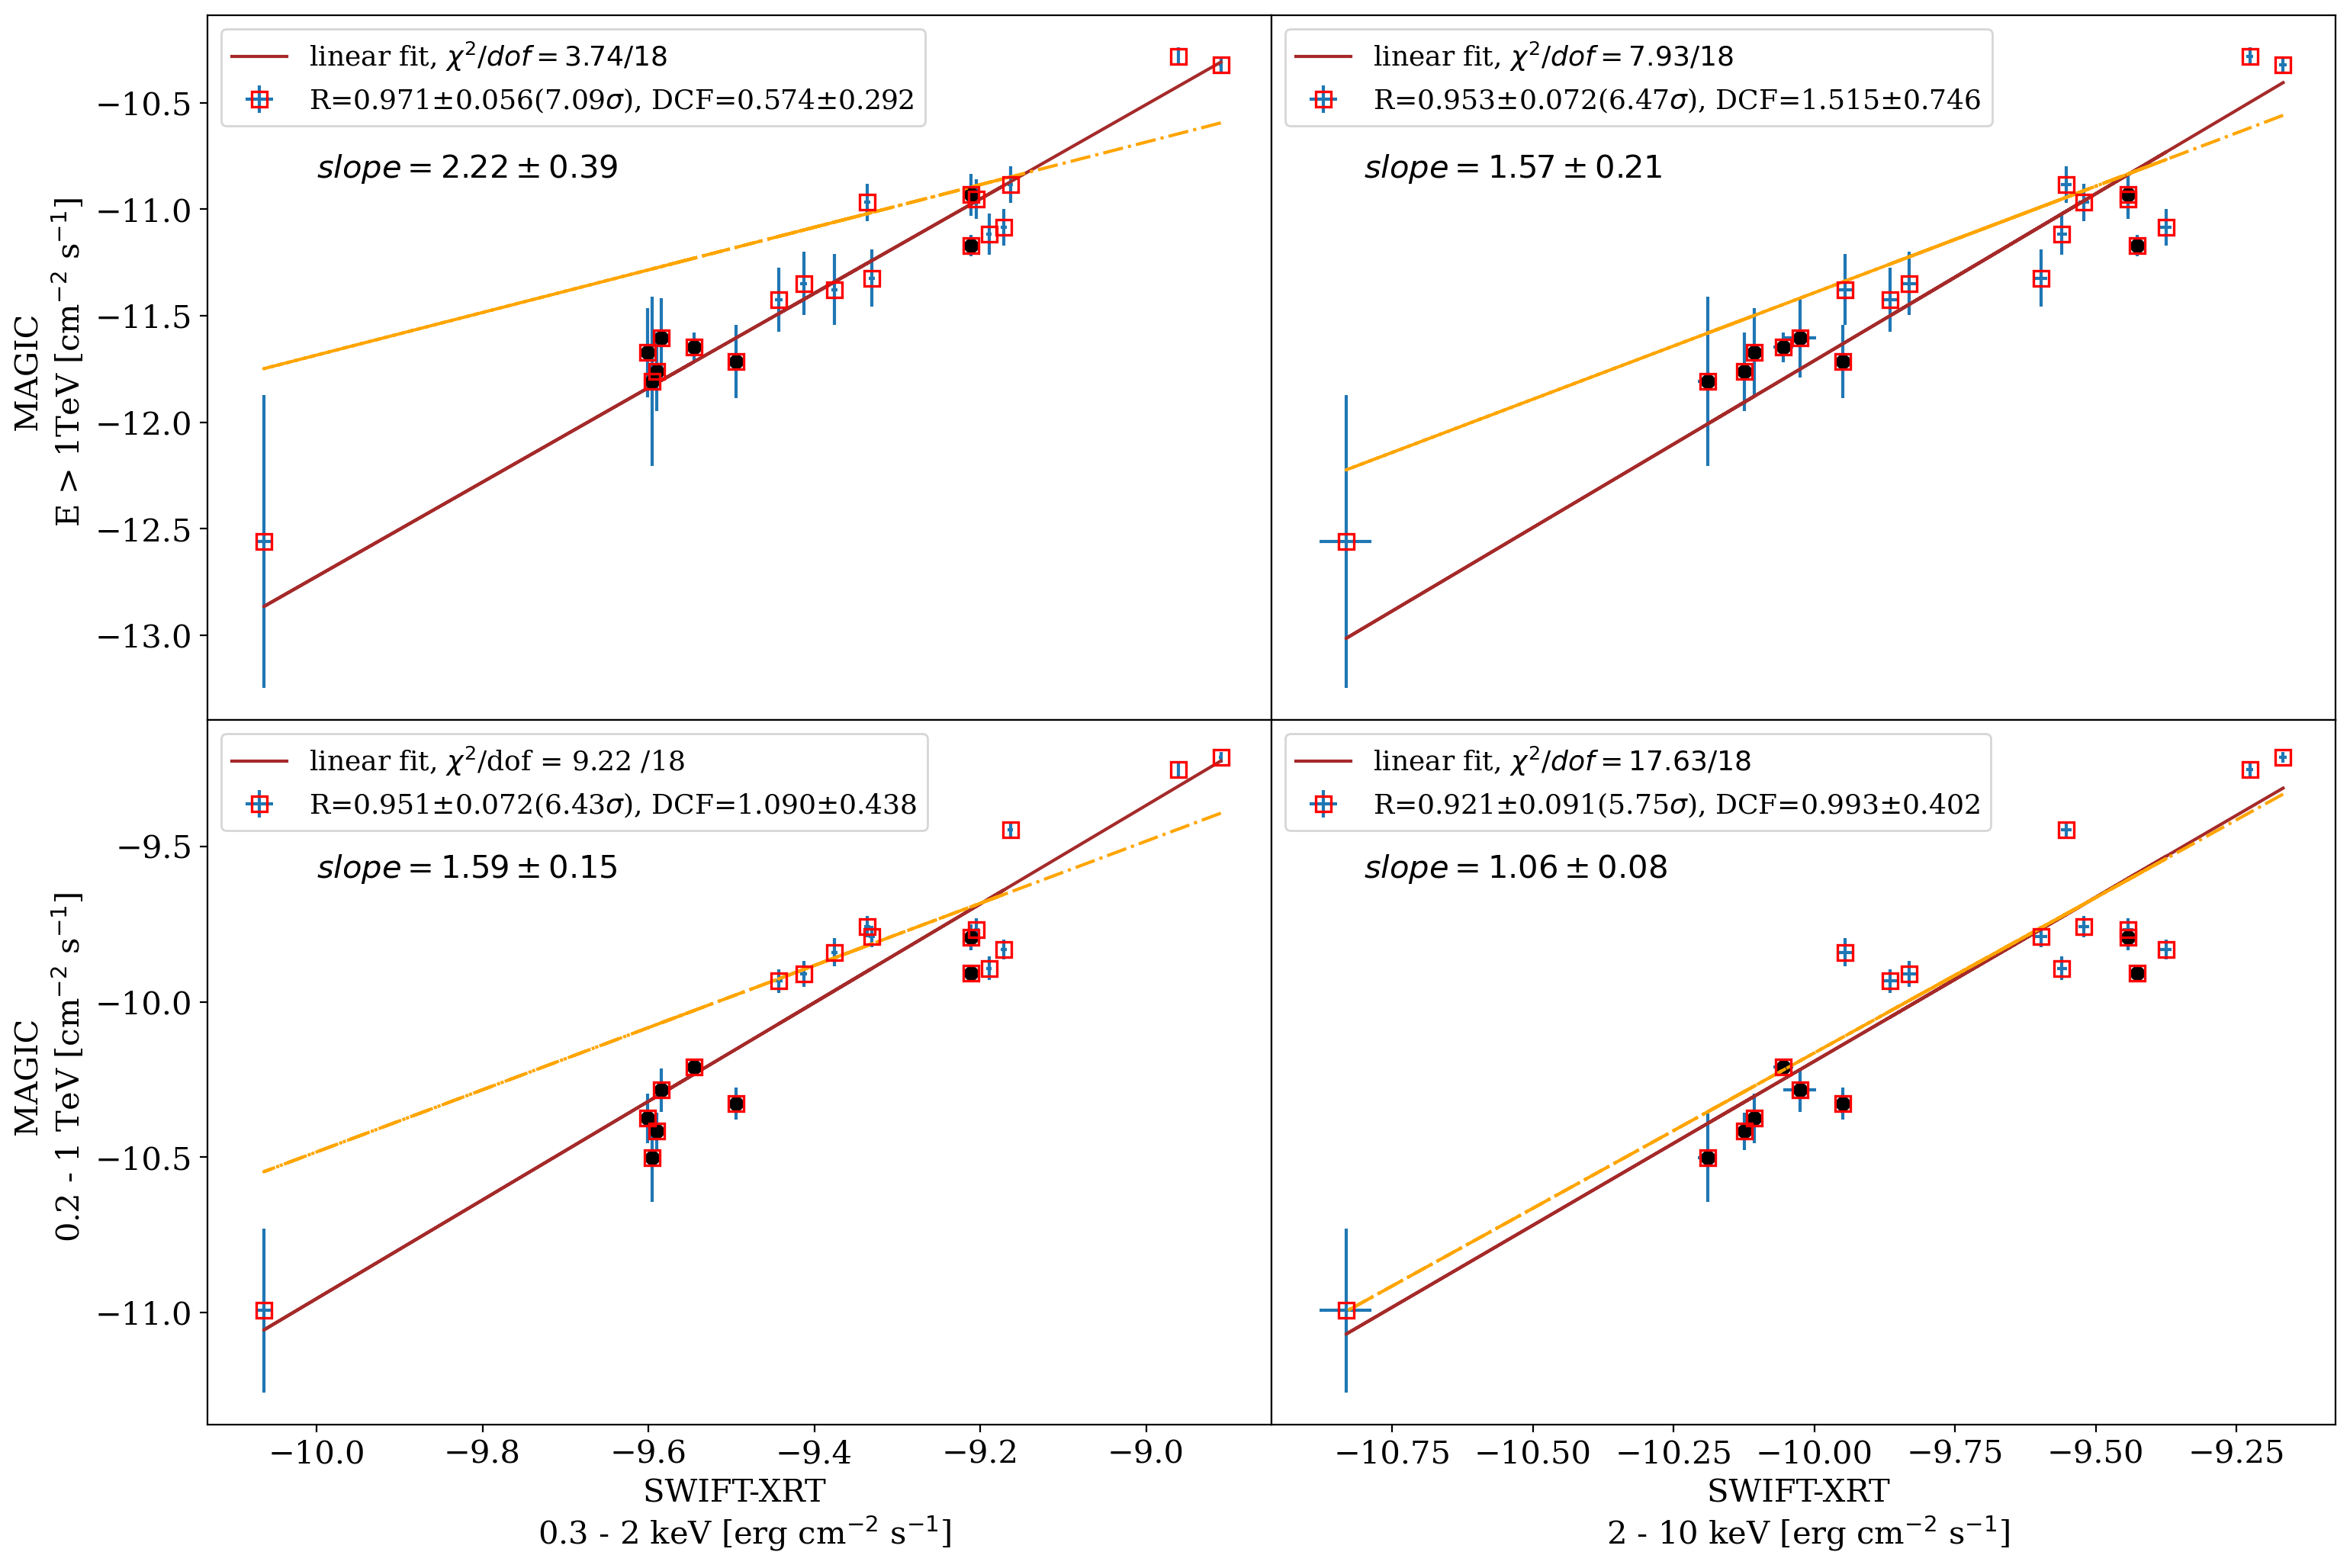

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.0, wspace=0.0)
#axs.tick_params(direction='out', length=6, width=2, colors='r', grid_color='r', grid_alpha=0.5)
#axs[0, 0].errorbar((matched_flux_xray_4_masked), (matched_flux_gamma_4_masked), yerr=[(err_gamma_lower_4), (err_gamma_upper_4)], xerr=[(err_lower_4), (err_upper_4)], marker='s', linestyle='none', markeredgecolor='red', markerfacecolor='none', markeredgewidth=1.2, label='R=0.898±0.103(5.52$\sigma$), DCF=1.4204±1.0269')
axs[0, 0].errorbar((matched_flux_xray_4), (matched_flux_gamma_4), yerr=matched_errors_gamma_4, xerr=[(matched_xray_elower_4_log), (matched_xray_eupper_4_log)], marker='s', linestyle='none', markersize= 7.5, markeredgecolor='red', markerfacecolor='none', markeredgewidth=1.2, label='R=0.971±0.056(7.09$\sigma$), DCF=0.574±0.292')
axs[0, 0].plot((matched_flux_xray_4), lin_func((matched_flux_xray_4), m4, c4), color='brown', label = 'linear fit, $\chi^2 /dof= {:.2f} /18$'.format(chi2_linear_4))
#axs[0, 0].plot((matched_flux_xray_4_masked), lin_func((matched_flux_xray_4_masked), *popt4_masked), color='orange', label = 'linear fit, $\chi^2_\mathrm{{red}} /dof= {:.2f} /18$'.format(chi2_red_linear_4/18))
axs[0, 0].plot((common_xray_4), (common_gamma_4), marker='o', color= 'black',linestyle='none')
axs[0, 0].text(-10, -10.85, r'$slope= {:.2f} \pm {:.2f}$'.format(m4, err_m4), fontsize = 15)
axs[0,0].plot((matched_flux_xray_4), lin_func_mod((matched_flux_xray_4), c4_mod), linestyle='-.', color='orange')
axs[0, 0].set_ylabel('MAGIC \n E > 1TeV [cm$^{-2}$ s$^{-1}$]')
#axs[0, 0].set_yscale('log')
#axs[0, 0].set_xscale('log')
axs[0, 0].set_xticks([])
axs[0, 0].legend(loc="upper left", fontsize=13)

axs[0, 1].errorbar((matched_flux_xray_2), (matched_flux_gamma_2), yerr=matched_errors_gamma_2, xerr=[(matched_xray_elower_2_log), (matched_xray_eupper_2_log)], marker='s', linestyle='none', markersize= 7.5, markeredgecolor='red', markerfacecolor='none', markeredgewidth=1.2, label='R=0.953±0.072(6.47$\sigma$), DCF=1.515±0.746') 
axs[0, 1].plot((matched_flux_xray_2), lin_func((matched_flux_xray_2), m2, c2), color='brown', label = r'linear fit, $\chi^2 /dof= {:.2f} /18$'.format(chi2_linear_2))
axs[0, 1].plot((common_xray_2), (common_gamma_2), marker='o', color= 'black',linestyle='none')
axs[0, 1].text(-10.8, -10.85, r'$slope= {:.2f} \pm {:.2f}$'.format(m2, err_m2), fontsize = 15)
axs[0, 1].plot((matched_flux_xray_2), lin_func_mod((matched_flux_xray_2), c2_mod), linestyle='-.', color='orange')
#axs[0, 1].set_yscale('log')
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].legend(loc="upper left", fontsize=13)


axs[1, 0].errorbar((matched_flux_xray_1), (matched_flux_gamma_1), yerr=matched_errors_gamma_1, xerr=[(matched_xray_elower_1_log), (matched_xray_eupper_1_log)], marker='s',linestyle='none', markersize= 7.5, markeredgecolor='red', markerfacecolor='none', markeredgewidth=1.2, label='R=0.951±0.072(6.43$\sigma$), DCF=1.090±0.438')
axs[1, 0].plot((matched_flux_xray_1), lin_func((matched_flux_xray_1), m1, c1), color='brown', label =r'linear fit, $\chi^2$/dof = {:.2f} /18'.format(chi2_linear_1))
axs[1, 0].text(-10, -9.6, r'$slope= {:.2f} \pm {:.2f}$'.format(m1, err_m1), fontsize = 15)
axs[1, 0].plot((common_xray_1), (common_gamma_1), marker='o', color= 'black',linestyle='none')
axs[1, 0].plot((matched_flux_xray_1), lin_func_mod((matched_flux_xray_1), c1_mod), linestyle='-.', color='orange')
axs[1, 0].set_xlabel('SWIFT-XRT \n 0.3 - 2 keV [erg cm$^{-2}$ s$^{-1}$]')
axs[1, 0].set_ylabel('MAGIC \n 0.2 - 1 TeV [cm$^{-2}$ s$^{-1}$]')
#axs[1, 0].set_xscale('log')
#axs[1, 0].set_yscale('log')
axs[1, 0].legend(loc="upper left", fontsize=13)


axs[1, 1].errorbar((matched_flux_xray_3), (matched_flux_gamma_3), yerr=matched_errors_gamma_3, xerr=[(matched_xray_elower_3_log), (matched_xray_eupper_3_log)], marker='s', linestyle='none', markersize= 7.5, markeredgecolor='red', markerfacecolor='none', markeredgewidth=1.2, label= 'R=0.921±0.091(5.75$\sigma$), DCF=0.993±0.402')
axs[1, 1].plot((matched_flux_xray_3), lin_func((matched_flux_xray_3), m3, c3), color='brown', label = r'linear fit, $\chi^2 / dof= {:.2f} /18$'.format(chi2_linear_3))
axs[1, 1].text(-10.8, -9.6, r'$slope= {:.2f} \pm {:.2f}$'.format(m3, err_m3), fontsize = 15)
axs[1, 1].plot((common_xray_3), (common_gamma_3),  marker = 'o', color= 'black', linestyle='none')
axs[1, 1].plot((matched_flux_xray_3), lin_func_mod((matched_flux_xray_3), c3_mod), linestyle='-.', color='orange')
axs[1, 1].set_xlabel('SWIFT-XRT \n 2 - 10 keV [erg cm$^{-2}$ s$^{-1}$]')
#axs[1, 1].set_yscale('log')
#axs[1, 1].set_xscale('log')
axs[1, 1].set_yticks([])
axs[1, 1].legend(loc="upper left", fontsize=13)

#plt.tight_layout()
plt.savefig('correlation_x-ray_VHE_new.png')


In [90]:
def pearson_error(r, n):
    # n: number of points, r: Pearson's r coefficient
    if n > 10:
        fisher_z = 0.5 * np.log((1 + r) / (1 - r))
        se = 1 / np.sqrt(n - 10)
        # Confidence interval for r using inverse transform
        z_upper = fisher_z + 1.96 * se
        z_lower = fisher_z - 1.96 * se
        r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)
        r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
        err = (r_upper - r_lower) / 2
        return err
    else:
        return np.nan

In [69]:
def pearson_err(r, n):
    return np.sqrt((1-r**2)/(n-2))

In [71]:
r_err1 = pearson_err(0.951, 20)
r_err2 = pearson_err(0.952, 20)
r_err3 = pearson_err(0.921, 20)
r_err4 = pearson_err(0.971, 20)
print(r_err1, r_err2, r_err3, r_err4)

0.07287698920479331 0.07214799604516635 0.09182077954121036 0.056351574955807615
